In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
#from datetime import datetime
from functools import reduce
import datetime
sns.set_style("darkgrid")

In [2]:
# load all the datasets to pandas DataFrames
klci         = pd.read_excel('data/Stock Exchange/FTSE Malaysia KLCI Historical (Malaysia).xlsx',header=0)

biodiesel    = pd.read_excel('data/Biodiesel - CPO Price.xlsx',header=0)
oil_wti       = pd.read_csv('data/Cushing_OK_WTI_Spot_Price_FOB.csv', sep = "|",header=4)
oil_brent     = pd.read_csv('data/Europe_Brent_Spot_Price_FOB (1).csv', sep = "|",header=4)
usd          = pd.read_excel('data/Forex USD-MYR.xlsx',header=0)
jpy          = pd.read_csv('data/JPY_MYR Historical Data.csv')
ucci         = pd.read_excel('data/Upstream Capital Cost Index.xlsx',header=1)


se_dow       = pd.read_excel('data/Stock Exchange/Dow Jones Industrial Average (DJI) (US).xlsx',header=0)
se_dax       = pd.read_excel('data/Stock Exchange/DAX Historical Data (Germany).xlsx',header=0)
se_stoxx     = pd.read_excel('data/Stock Exchange/Euro Stoxx 50 Historical Data (US).xlsx',header=0)
se_uk        = pd.read_excel('data/Stock Exchange/FTSE 100 Historical Data (UK).xlsx',header=0)
se_sg        = pd.read_excel('data/Stock Exchange/FTSE Straits Times Singapore Hi (Singapore).xlsx',header=0)
se_hs        = pd.read_excel('data/Stock Exchange/Hang Seng Historical Data (HK).xlsx',header=0)
se_nasdaq    = pd.read_excel('data/Stock Exchange/Nasdaq 100 Historical Data (US).xlsx',header=0)
se_nikkei    = pd.read_excel('data/Stock Exchange/Nikkei 225 Historical Data (Japan).xlsx',header=0)
se_snp       = pd.read_excel('data/Stock Exchange/S_P 500 (US).xlsx',header=0)
se_shanghai  = pd.read_excel('data/Stock Exchange/Shanghai Composite Historical D (China).xlsx',header=0)

In [3]:
# Visually inspect the dataframes

klci.head()
biodiesel.head()
oil_wti.head()
oil_brent.head()
usd.head()
jpy.head()
ucci.head()
se_dow.head()
se_dax.head()
se_stoxx.head()
se_uk.head()
se_sg.head()
se_hs.head()
se_nasdaq.head()
se_nikkei.head()
se_snp.head()
se_shanghai.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"May 29, 2020",2852.35,2835.58,2855.38,2829.63,20.68B,0.0022
1,"May 28, 2020",2846.22,2838.21,2861.92,2820.15,20.75B,0.0033
2,"May 27, 2020",2836.80,2847.32,2849.00,2831.93,19.81B,-0.0034
3,"May 26, 2020",2846.55,2827.90,2848.34,2825.90,17.46B,0.0101
4,"May 25, 2020",2817.97,2816.24,2821.50,2802.47,17.29B,0.0015


In [4]:
# get the shape of the different datasets
dflist = [klci, biodiesel,oil_wti,oil_brent,usd,jpy,ucci,se_dow,se_dax,se_stoxx,se_uk,se_sg,se_hs,se_nasdaq,se_nikkei,se_snp,se_shanghai]

for i, dfr in enumerate(dflist):
 print(dflist[i].shape)

(2477, 7)
(241, 4)
(8670, 2)
(8382, 2)
(7818, 3)
(3407, 6)
(84, 2)
(2618, 7)
(2640, 7)
(2255, 7)
(2628, 7)
(2330, 7)
(2568, 7)
(2619, 7)
(2573, 7)
(2619, 7)
(2529, 7)


In [5]:
# get dataframe top rows view

for i, dfr in enumerate(dflist):
    print(dflist[i].head())

           Date    Price     Open     High      Low     Vol.  Change %
0  May 29, 2020  1473.25  1450.54  1473.77  1448.84  595.84M    0.0108
1  May 28, 2020  1457.50  1453.53  1458.73  1449.25  189.53M    0.0040
2  May 27, 2020  1451.73  1446.91  1458.24  1446.42  189.84M    0.0104
3  May 22, 2020  1436.76  1451.37  1451.44  1435.23  144.05M   -0.0106
4  May 21, 2020  1452.11  1437.49  1455.13  1437.13  168.06M    0.0118
                  Original Month-Year   Price  Price Cleansed
0        Apr 20001,413.60- 2000-04-01  1413.6          1413.6
1  May 20001,231.20-12.90  2000-05-01  1231.2          1231.2
2   Jun 20001,197.00-2.78  2000-06-01    1197          1197.0
3   Jul 20001,185.60-0.95  2000-07-01  1185.6          1185.6
4   Aug 20001,162.80-1.92  2000-08-01  1162.8          1162.8
         Day  Cushing OK WTI Spot Price FOB  Dollars per Barrel
0  5/27/2020                                              32.80
1  5/26/2020                                              34.70
2  5/22/20

In [6]:
# we look at the statistical charateristics of the datsets

for i, dfr in enumerate(dflist):
    print(dflist[i].describe())

             Price         Open        High          Low     Change %
count  2477.000000  2477.000000  2477.00000  2477.000000  2477.000000
mean   1666.653113  1666.370945  1671.74692  1660.694267     0.000068
std     134.667234   134.906438   134.34217   135.297094     0.006300
min    1219.720000  1217.280000  1242.82000  1207.800000    -0.052600
25%    1584.900000  1585.170000  1590.51000  1580.460000    -0.002900
50%    1672.720000  1673.840000  1678.24000  1667.680000     0.000200
75%    1774.000000  1774.420000  1778.47000  1769.120000     0.003400
max    1895.180000  1895.550000  1896.23000  1891.660000     0.068500
       Price Cleansed
count      241.000000
mean      2397.917510
std        751.643413
min        889.200000
25%       1668.200000
50%       2515.350000
75%       2943.860000
max       3980.250000
       Cushing OK WTI Spot Price FOB  Dollars per Barrel
count                                        8670.000000
mean                                           44.066501
s

In [7]:
# see which datasets have missing values

for i, dfr in enumerate(dflist):
    print(dflist[i].isnull().sum().sum())

0
0
0
0
0
0
3
0
0
0
0
0
0
0
0
0
0


In [8]:
#drop missing value
ucci = ucci.dropna(axis=0)

### Observations and Data Cleaning:

 - ucci and biodiesel data need to be upscaled
 - ucci also has 3 NaN values so we have to remove entire rows where this exists
 - For our purposes, most dataframe has extra columns so we will need to get rid of some of them.
 - The date formats need to be converted to a uniform format across all datasets.

#### Biodiesel

In [9]:
print(biodiesel.shape)


biodiesel.head()

(241, 4)


,Original,Month-Year,Price,Price Cleansed
0,"Apr 20001,413.60-",2000-04-01,1413.6,1413.6
1,"May 20001,231.20-12.90",2000-05-01,1231.2,1231.2
2,"Jun 20001,197.00-2.78",2000-06-01,1197,1197.0
3,"Jul 20001,185.60-0.95",2000-07-01,1185.6,1185.6
4,"Aug 20001,162.80-1.92",2000-08-01,1162.8,1162.8


In [10]:
#checking the date format (already in datetime format, so dont need to change)
biodiesel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 4 columns):
Original          241 non-null object
Month-Year        241 non-null datetime64[ns]
Price             241 non-null object
Price Cleansed    241 non-null float64
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 7.7+ KB


In [11]:
# drop the unnecessary columns

biodiesel.drop(["Original", "Price"],axis=1,inplace=True)
biodiesel.head()

,Month-Year,Price Cleansed
0,2000-04-01,1413.6
1,2000-05-01,1231.2
2,2000-06-01,1197.0
3,2000-07-01,1185.6
4,2000-08-01,1162.8


In [12]:
biodiesel.columns = ["Date", "Biodiesel"]
biodiesel.head()

,Date,Biodiesel
0,2000-04-01,1413.6
1,2000-05-01,1231.2
2,2000-06-01,1197.0
3,2000-07-01,1185.6
4,2000-08-01,1162.8


In [13]:
# Upscaling the data so it will include the days, and use interpolate to determine the value in between
biodiesel = biodiesel.resample('D', on="Date").mean()
biodiesel = biodiesel.interpolate(method='linear')
print(biodiesel.head(10))


            Biodiesel
Date                 
2000-04-01    1413.60
2000-04-02    1407.52
2000-04-03    1401.44
2000-04-04    1395.36
2000-04-05    1389.28
2000-04-06    1383.20
2000-04-07    1377.12
2000-04-08    1371.04
2000-04-09    1364.96
2000-04-10    1358.88


In [14]:
# Bring the date column from the index into a column
biodiesel.reset_index(level=0,inplace=True)
biodiesel.head()

,Date,Biodiesel
0,2000-04-01,1413.60
1,2000-04-02,1407.52
2,2000-04-03,1401.44
3,2000-04-04,1395.36
4,2000-04-05,1389.28


#### UCCI

In [15]:
ucci.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 0 to 80
Data columns (total 2 columns):
Quarter                    81 non-null object
UCCI Asia and Australia    81 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.9+ KB


In [16]:
print(ucci.shape)
ucci.head()

(81, 2)


,Quarter,UCCI Asia and Australia
0,Q1 2000,100.0
1,Q2 2000,100.0
2,Q3 2000,100.0
3,Q4 2000,100.0
4,Q1 2001,100.5


In [17]:
# rename columns
ucci.columns = ["Quarter","UCCI"]

In [18]:
# Convert the Quarter column to datetime format

ucci['Date'] = (
    pd.to_datetime(
        ucci['Quarter'].str.split(' ').apply(lambda x: ''.join(x[::-1]))
))

ucci.head()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Quarter,UCCI,Date
0,Q1 2000,100.0,2000-01-01
1,Q2 2000,100.0,2000-04-01
2,Q3 2000,100.0,2000-07-01
3,Q4 2000,100.0,2000-10-01
4,Q1 2001,100.5,2001-01-01


In [19]:
# Rearranging the column

cols = ucci.columns.tolist()
cols = cols[-1:] + cols[:-1]
cols

['Date', 'Quarter', 'UCCI']

In [20]:
# applying the column arrangement

ucci = ucci[cols]
ucci.tail()

,Date,Quarter,UCCI
76,2019-01-01,Q1 2019,185.154206
77,2019-04-01,Q2 2019,186.502733
78,2019-07-01,Q3 2019,185.918466
79,2019-10-01,Q4 2019,182.591780
80,2020-01-01,Q1 2020,181.158439


In [21]:
# Upscaling the data so it will include the days, and use interpolate to determine the value in between

ucci = ucci.resample('D', on="Date").mean()
ucci = ucci.interpolate(method='linear')
print(ucci.tail(15))


                  UCCI
Date                  
2019-12-18  181.376556
2019-12-19  181.360976
2019-12-20  181.345397
2019-12-21  181.329817
2019-12-22  181.314237
2019-12-23  181.298657
2019-12-24  181.283077
2019-12-25  181.267498
2019-12-26  181.251918
2019-12-27  181.236338
2019-12-28  181.220758
2019-12-29  181.205178
2019-12-30  181.189599
2019-12-31  181.174019
2020-01-01  181.158439


In [22]:
# Bring the date column from the index into a column

ucci.reset_index(level=0,inplace=True)
ucci.head()

,Date,UCCI
0,2000-01-01,100.0
1,2000-01-02,100.0
2,2000-01-03,100.0
3,2000-01-04,100.0
4,2000-01-05,100.0


#### Other Columns

In [23]:
#  Changing the DATE column from String to python's datetime format for 

klci["Date"] = pd.to_datetime(klci.Date)
oil_wti["Day"] = pd.to_datetime(oil_wti.Day)
oil_brent["Day"] = pd.to_datetime(oil_brent.Day)
jpy["Date"] = pd.to_datetime(jpy.Date)

se_dow["Date"] = pd.to_datetime(se_dow.Date)
se_dax["Date"] = pd.to_datetime(se_dax.Date)
se_stoxx["Date"] = pd.to_datetime(se_stoxx.Date)
se_uk["Date"] = pd.to_datetime(se_uk.Date)
se_sg["Date"] = pd.to_datetime(se_sg.Date)
se_hs["Date"] = pd.to_datetime(se_hs.Date)
se_nasdaq["Date"] = pd.to_datetime(se_nasdaq.Date)
se_nikkei["Date"] = pd.to_datetime(se_nikkei.Date)
se_snp["Date"] = pd.to_datetime(se_snp.Date)
se_shanghai["Date"] = pd.to_datetime(se_shanghai.Date)

se_shanghai.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-05-29,2852.35,2835.58,2855.38,2829.63,20.68B,0.0022
1,2020-05-28,2846.22,2838.21,2861.92,2820.15,20.75B,0.0033
2,2020-05-27,2836.80,2847.32,2849.00,2831.93,19.81B,-0.0034
3,2020-05-26,2846.55,2827.90,2848.34,2825.90,17.46B,0.0101
4,2020-05-25,2817.97,2816.24,2821.50,2802.47,17.29B,0.0015


In [24]:
# Dropping unnecassary columns 

klci.drop(["Open", "High", "Low", "Vol.","Change %"],axis=1,inplace=True)
usd.drop(["USD"],axis=1,inplace=True)
jpy.drop(["Open", "High", "Low", "Change %"],axis=1,inplace=True)

se_dow.drop(["Open", "High", "Low", "Vol.","Change %"],axis=1,inplace=True)
se_dax.drop(["Open", "High", "Low", "Vol.","Change %"],axis=1,inplace=True)
se_stoxx.drop(["Open", "High", "Low", "Vol.","Change %"],axis=1,inplace=True)
se_uk.drop(["Open", "High", "Low", "Vol.","Change %"],axis=1,inplace=True)
se_sg.drop(["Open", "High", "Low", "Vol.","Change %"],axis=1,inplace=True)
se_hs.drop(["Open", "High", "Low", "Vol.","Change %"],axis=1,inplace=True)
se_nasdaq.drop(["Open", "High", "Low", "Vol.","Change %"],axis=1,inplace=True)
se_nikkei.drop(["Open", "High", "Low", "Vol.","Change %"],axis=1,inplace=True)
se_snp.drop(["Open", "High", "Low", "Vol.","Change %"],axis=1,inplace=True)
se_shanghai.drop(["Open", "High", "Low", "Vol.","Change %"],axis=1,inplace=True)

se_shanghai.head()

,Date,Price
0,2020-05-29,2852.35
1,2020-05-28,2846.22
2,2020-05-27,2836.80
3,2020-05-26,2846.55
4,2020-05-25,2817.97


In [25]:
# Changing Columns

klci.columns = ["Date", "KLCI"]
oil_wti.columns = ['Date', 'oil_wti']
oil_brent.columns = ['Date', 'oil_brent']
usd.columns = ["Date", "USD"]
jpy.columns = ["Date", "JPY"]

se_dow.columns = ["Date", "Dow Jones"]
se_dax.columns = ["Date", "DAX"]
se_stoxx.columns = ["Date", "STOXX"]
se_uk.columns = ["Date", "United Kingdom"]
se_sg.columns = ["Date", "Singapore"]
se_hs.columns = ["Date", "Hang_Seng"]
se_nasdaq.columns = ["Date", "Nasdaq"]
se_nikkei.columns = ["Date", "Nikkei"]
se_snp.columns = ["Date", "SP500"]
se_shanghai.columns = ["Date", "Shanghai"]

se_shanghai.head()

,Date,Shanghai
0,2020-05-29,2852.35
1,2020-05-28,2846.22
2,2020-05-27,2836.80
3,2020-05-26,2846.55
4,2020-05-25,2817.97


## Merging

In [26]:
dfs = [klci, biodiesel,oil_wti,oil_brent,usd,jpy,ucci,se_dow,se_dax,se_stoxx,se_uk,se_sg,se_hs,se_nasdaq,se_nikkei,se_snp,se_shanghai]
df = reduce(lambda left,right: pd.merge(left,right,on='Date', how='outer'), dfs).dropna()
df

,Date,KLCI,Biodiesel,oil_wti,oil_brent,USD,JPY,UCCI,Dow Jones,DAX,STOXX,United Kingdom,Singapore,Hang_Seng,Nasdaq,Nikkei,SP500,Shanghai
102,2019-12-30,1615.67,3297.009355,61.66,68.30,4.1065,0.03775,181.189599,28462.14,13249.01,3748.47,7587.05,3222.44,28319.39,8709.73,23656.62,3221.29,3040.02
103,2019-12-27,1610.61,3283.958387,61.76,68.91,4.1275,0.03771,181.236338,28645.26,13337.11,3782.27,7644.90,3226.53,28225.42,8770.98,23837.72,3240.02,3005.04
106,2019-12-23,1614.18,3266.557097,60.51,67.49,4.1425,0.03787,181.298657,28551.53,13300.98,3776.66,7623.59,3214.00,27906.41,8696.01,23821.11,3224.01,2962.75
107,2019-12-20,1610.18,3253.506129,60.43,68.66,4.1400,0.03782,181.345397,28455.09,13318.90,3776.56,7582.48,3212.39,27871.35,8678.49,23816.63,3221.22,3004.94
108,2019-12-19,1596.01,3249.155806,61.30,69.70,4.1420,0.03786,181.360976,28376.96,13211.96,3739.17,7573.82,3207.42,27800.49,8641.29,23864.85,3205.37,3017.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2165,2011-08-19,1483.98,3267.498065,82.33,109.37,2.9815,0.03900,205.241049,10817.65,5480.00,2159.07,5040.76,2733.63,19399.92,2038.22,8719.24,1123.53,2534.36
2166,2011-08-18,1503.30,3265.584839,82.38,108.36,2.9810,0.03900,205.271384,10990.58,5602.80,2206.61,5092.23,2824.96,20016.27,2073.03,8943.76,1140.65,2559.47
2167,2011-08-17,1503.07,3263.671613,87.58,111.37,2.9730,0.03890,205.301719,11410.21,5948.94,2331.12,5331.60,2828.53,20289.03,2181.62,9057.26,1193.89,2601.26
2168,2011-08-16,1498.24,3261.758387,86.65,109.69,2.9835,0.03890,205.332054,11405.93,5994.90,2323.67,5357.63,2832.73,20212.08,2194.27,9107.43,1192.76,2608.17


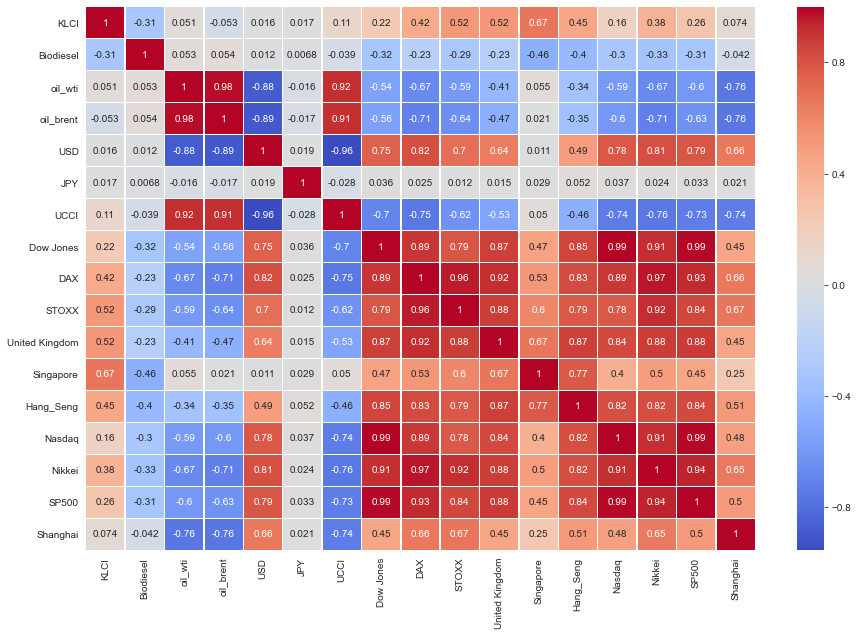

In [27]:
df_corr = df.corr()

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_corr,annot=True,cmap='coolwarm',linecolor='white',linewidths=.5)

In [28]:
df

,Date,KLCI,Biodiesel,oil_wti,oil_brent,USD,JPY,UCCI,Dow Jones,DAX,STOXX,United Kingdom,Singapore,Hang_Seng,Nasdaq,Nikkei,SP500,Shanghai
102,2019-12-30,1615.67,3297.009355,61.66,68.30,4.1065,0.03775,181.189599,28462.14,13249.01,3748.47,7587.05,3222.44,28319.39,8709.73,23656.62,3221.29,3040.02
103,2019-12-27,1610.61,3283.958387,61.76,68.91,4.1275,0.03771,181.236338,28645.26,13337.11,3782.27,7644.90,3226.53,28225.42,8770.98,23837.72,3240.02,3005.04
106,2019-12-23,1614.18,3266.557097,60.51,67.49,4.1425,0.03787,181.298657,28551.53,13300.98,3776.66,7623.59,3214.00,27906.41,8696.01,23821.11,3224.01,2962.75
107,2019-12-20,1610.18,3253.506129,60.43,68.66,4.1400,0.03782,181.345397,28455.09,13318.90,3776.56,7582.48,3212.39,27871.35,8678.49,23816.63,3221.22,3004.94
108,2019-12-19,1596.01,3249.155806,61.30,69.70,4.1420,0.03786,181.360976,28376.96,13211.96,3739.17,7573.82,3207.42,27800.49,8641.29,23864.85,3205.37,3017.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2165,2011-08-19,1483.98,3267.498065,82.33,109.37,2.9815,0.03900,205.241049,10817.65,5480.00,2159.07,5040.76,2733.63,19399.92,2038.22,8719.24,1123.53,2534.36
2166,2011-08-18,1503.30,3265.584839,82.38,108.36,2.9810,0.03900,205.271384,10990.58,5602.80,2206.61,5092.23,2824.96,20016.27,2073.03,8943.76,1140.65,2559.47
2167,2011-08-17,1503.07,3263.671613,87.58,111.37,2.9730,0.03890,205.301719,11410.21,5948.94,2331.12,5331.60,2828.53,20289.03,2181.62,9057.26,1193.89,2601.26
2168,2011-08-16,1498.24,3261.758387,86.65,109.69,2.9835,0.03890,205.332054,11405.93,5994.90,2323.67,5357.63,2832.73,20212.08,2194.27,9107.43,1192.76,2608.17


In [38]:
df_new = df.copy()

for i in df:
    if i == "Date":
        pass
    else:
        diffs = df[i].diff()
        df_new[i] =diffs

diffs = df.oil_wti.diff()
df_new = df_new.assign(oil_movement=np.where(
        diffs > 0, 'increase', np.where(
            diffs < 0, 'decline', 'no movement')))

      
df_new =df_new[1:]
df_new

,Date,KLCI,Biodiesel,oil_wti,oil_brent,USD,JPY,UCCI,Dow Jones,DAX,STOXX,United Kingdom,Singapore,Hang_Seng,Nasdaq,Nikkei,SP500,Shanghai,oil_movement
103,2019-12-27,-5.06,-13.050968,0.10,0.61,0.0210,-0.00004,0.046739,183.12,88.10,33.80,57.85,4.09,-93.97,61.25,181.10,18.73,-34.98,increase
106,2019-12-23,3.57,-17.401290,-1.25,-1.42,0.0150,0.00016,0.062319,-93.73,-36.13,-5.61,-21.31,-12.53,-319.01,-74.97,-16.61,-16.01,-42.29,decline
107,2019-12-20,-4.00,-13.050968,-0.08,1.17,-0.0025,-0.00005,0.046739,-96.44,17.92,-0.10,-41.11,-1.61,-35.06,-17.52,-4.48,-2.79,42.19,decline
108,2019-12-19,-14.17,-4.350323,0.87,1.04,0.0020,0.00004,0.015580,-78.13,-106.94,-37.39,-8.66,-4.97,-70.86,-37.20,48.22,-15.85,12.13,increase
109,2019-12-18,3.10,-4.350323,-0.37,-0.58,-0.0035,-0.00008,0.015580,-137.68,10.20,-0.17,-33.07,2.12,83.72,-60.67,69.58,-14.23,-0.03,decline
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2165,2011-08-19,11.82,-5.739677,-2.09,0.54,0.0135,0.00040,0.091005,-37.00,6.22,-24.32,-54.54,1.82,-86.95,-6.51,91.11,-0.29,18.50,decline
2166,2011-08-18,19.32,-1.913226,0.05,-1.01,-0.0005,0.00000,0.030335,172.93,122.80,47.54,51.47,91.33,616.35,34.81,224.52,17.12,25.11,increase
2167,2011-08-17,-0.23,-1.913226,5.20,3.01,-0.0080,-0.00010,0.030335,419.63,346.14,124.51,239.37,3.57,272.76,108.59,113.50,53.24,41.79,increase
2168,2011-08-16,-4.83,-1.913226,-0.93,-1.68,0.0105,0.00000,0.030335,-4.28,45.96,-7.45,26.03,4.20,-76.95,12.65,50.17,-1.13,6.91,decline


In [39]:
x = df_new.drop({'Date',"Biodiesel","KLCI", 'oil_wti', 'oil_brent', 'JPY',
       'Dow Jones', 'DAX', 'STOXX', 'United Kingdom', 'Singapore',
       'Hang_Seng', 'Nasdaq', 'Nikkei', 'SP500', 'oil_movement'},axis = 1)
y = df_new["oil_movement"]


print(x.shape)
print(y.shape)

x.head()

(1712, 3)
(1712,)


,USD,UCCI,Shanghai
103,0.0210,0.046739,-34.98
106,0.0150,0.062319,-42.29
107,-0.0025,0.046739,42.19
108,0.0020,0.015580,12.13
109,-0.0035,0.015580,-0.03


In [60]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(1369, 3)
(343, 3)
(1369,)
(343,)


In [61]:
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB()                               
model.fit(xtrain, ytrain)                  
y_model = model.predict(xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.49271137026239065

In [62]:
# confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(ytest, y_model)


array([[130,  24,   2],
       [145,  39,   0],
       [  2,   1,   0]], dtype=int64)

In [63]:
# Modeling
# classification
diffs = df.oil_wti.diff()
df_new = df.assign(oil_movement=np.where(
        diffs > 0, 'increase', np.where(
            diffs < 0, 'decline', 'no movement')))
df_new 

,Date,KLCI,Biodiesel,oil_wti,oil_brent,USD,JPY,UCCI,Dow Jones,DAX,STOXX,United Kingdom,Singapore,Hang_Seng,Nasdaq,Nikkei,SP500,Shanghai,oil_movement
102,2019-12-30,1615.67,3297.009355,61.66,68.30,4.1065,0.03775,181.189599,28462.14,13249.01,3748.47,7587.05,3222.44,28319.39,8709.73,23656.62,3221.29,3040.02,no movement
103,2019-12-27,1610.61,3283.958387,61.76,68.91,4.1275,0.03771,181.236338,28645.26,13337.11,3782.27,7644.90,3226.53,28225.42,8770.98,23837.72,3240.02,3005.04,increase
106,2019-12-23,1614.18,3266.557097,60.51,67.49,4.1425,0.03787,181.298657,28551.53,13300.98,3776.66,7623.59,3214.00,27906.41,8696.01,23821.11,3224.01,2962.75,decline
107,2019-12-20,1610.18,3253.506129,60.43,68.66,4.1400,0.03782,181.345397,28455.09,13318.90,3776.56,7582.48,3212.39,27871.35,8678.49,23816.63,3221.22,3004.94,decline
108,2019-12-19,1596.01,3249.155806,61.30,69.70,4.1420,0.03786,181.360976,28376.96,13211.96,3739.17,7573.82,3207.42,27800.49,8641.29,23864.85,3205.37,3017.07,increase
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2165,2011-08-19,1483.98,3267.498065,82.33,109.37,2.9815,0.03900,205.241049,10817.65,5480.00,2159.07,5040.76,2733.63,19399.92,2038.22,8719.24,1123.53,2534.36,decline
2166,2011-08-18,1503.30,3265.584839,82.38,108.36,2.9810,0.03900,205.271384,10990.58,5602.80,2206.61,5092.23,2824.96,20016.27,2073.03,8943.76,1140.65,2559.47,increase
2167,2011-08-17,1503.07,3263.671613,87.58,111.37,2.9730,0.03890,205.301719,11410.21,5948.94,2331.12,5331.60,2828.53,20289.03,2181.62,9057.26,1193.89,2601.26,increase
2168,2011-08-16,1498.24,3261.758387,86.65,109.69,2.9835,0.03890,205.332054,11405.93,5994.90,2323.67,5357.63,2832.73,20212.08,2194.27,9107.43,1192.76,2608.17,decline


In [64]:
df_new.columns

Index(['Date', 'KLCI', 'Biodiesel', 'oil_wti', 'oil_brent', 'USD', 'JPY',
       'UCCI', 'Dow Jones', 'DAX', 'STOXX', 'United Kingdom', 'Singapore',
       'Hang_Seng', 'Nasdaq', 'Nikkei', 'SP500', 'Shanghai', 'oil_movement'],
      dtype='object')

In [66]:
x = df_new.drop({'Date',"Biodiesel",'KLCI', 'oil_wti', 'oil_brent', 'JPY',
       'Dow Jones', 'DAX', 'STOXX', 'United Kingdom', 'Singapore',
       'Hang_Seng', 'Nasdaq', 'Nikkei', 'SP500', 'oil_movement'},axis = 1)
y = df_new["oil_movement"]


print(x.shape)
print(y.shape)

x.head()

(1713, 3)
(1713,)


,USD,UCCI,Shanghai
102,4.1065,181.189599,3040.02
103,4.1275,181.236338,3005.04
106,4.1425,181.298657,2962.75
107,4.1400,181.345397,3004.94
108,4.1420,181.360976,3017.07


In [67]:
y.head()

102    no movement
103       increase
106        decline
107        decline
108       increase
Name: oil_movement, dtype: object

In [68]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(1370, 3)
(343, 3)
(1370,)
(343,)


In [73]:
# classification
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB()                               
model.fit(xtrain, ytrain)                  
y_model = model.predict(xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.5364431486880467

In [74]:
# confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(ytest, y_model)


array([[162,  20],
       [139,  22]], dtype=int64)

In [71]:
# K neighbour classification
# K-Nearest Neighbour (KNN) model, k=1
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
model.fit(xtrain, ytrain)                         
y_model = model.predict(xtest)                
accuracy_score(ytest, y_model)

0.5014577259475219

In [72]:
# Modeling
# classification
diffs = df.KLCI.diff()
df_new = df.assign(KLCI_movement=np.where(
        diffs > 0, 'increase', np.where(
            diffs < 0, 'decline', 'no movement')))


In [38]:
df_new.columns

Index(['Date', 'KLCI', 'Biodiesel', 'oil_wti', 'oil_brent', 'USD', 'JPY',
       'UCCI', 'Dow Jones', 'DAX', 'STOXX', 'United Kingdom', 'Singapore',
       'Hang_Seng', 'Nasdaq', 'Nikkei', 'SP500', 'Shanghai', 'KLCI_movement'],
      dtype='object')

In [57]:
x = df_new.drop({"Date","KLCI",'oil_wti','USD', 'JPY',
       'UCCI','Dow Jones','Nasdaq', 'SP500', 'Shanghai',"KLCI_movement"},axis = 1)
y = df_new["KLCI_movement"]


print(x.shape)
print(y.shape)

x.head()

(1713, 8)
(1713,)


,Biodiesel,oil_brent,DAX,STOXX,United Kingdom,Singapore,Hang_Seng,Nikkei
102,3297.009355,68.30,13249.01,3748.47,7587.05,3222.44,28319.39,23656.62
103,3283.958387,68.91,13337.11,3782.27,7644.90,3226.53,28225.42,23837.72
106,3266.557097,67.49,13300.98,3776.66,7623.59,3214.00,27906.41,23821.11
107,3253.506129,68.66,13318.90,3776.56,7582.48,3212.39,27871.35,23816.63
108,3249.155806,69.70,13211.96,3739.17,7573.82,3207.42,27800.49,23864.85


In [58]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

In [59]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(1370, 8)
(343, 8)
(1370,)
(343,)


In [60]:
# classification
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB()                               
model.fit(xtrain, ytrain)                  
y_model = model.predict(xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.5451895043731778

In [61]:
# K neighbour classification
# K-Nearest Neighbour (KNN) model, k=1
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
model.fit(xtrain, ytrain)                         
y_model = model.predict(xtest)                
accuracy_score(ytest, y_model)

0.521865889212828

In [44]:
# confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(ytest, y_model)


array([[90, 95,  0],
       [69, 87,  0],
       [ 2,  0,  0]], dtype=int64)

In [30]:
# For regression
df_new = df.copy()
df_new["KLCI_movement"] = df.KLCI.diff()
df_new.loc[102,"KLCI_movement"] = 0

In [32]:

x = df_new.drop({"Date","KLCI","KLCI_movement"},axis = 1)
y = df_new["KLCI_movement"]



print(x.shape)
print(y.shape)

# diffs = df.KLCI.diff()
# df.assign(
#     change=np.where(
#         diffs > 0, 'increase', np.where(
#             diffs < 0, 'decline', '------')))

y.head()

(1713, 16)
(1713,)


102     0.00
103    -5.06
106     3.57
107    -4.00
108   -14.17
Name: KLCI_movement, dtype: float64

In [33]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

In [34]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(1370, 16)
(343, 16)
(1370,)
(343,)


In [35]:
from sklearn import tree
model = tree.DecisionTreeRegressor()
model.fit(xtrain, ytrain)                  
y_model = model.predict(xtest)


In [213]:
## from sklearn.metrics import explained_variance_score
# explained_variance_score(ytest, y_model)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest, y_model)

10.974985422740515